In [40]:
import pandas as pd
import numpy as np

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
# import application data
application=pd.read_csv('application_record.csv')

In [43]:
# import credit report data
credit=pd.read_csv('credit_record.csv')

In [44]:
#looking at the application
application.head()

,ID,GENDER,CAR,PROPERTY,NO. CHILDREN,ANNUAL INCOME,INCOME_TYPE,EDUCATION LEVEL,MARITAL_STATUS,HOUSING_TYPE,BIRTH DAY,EMPLOYED,MOBILE,WORK_PHONE,PHONE,EMAIL,OCCUPATION,FAMILY_SIZE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1


In [45]:
#looking at the credit report 
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [46]:
#looking at the null values
application.isna().sum()

ID                      0
GENDER                  0
CAR                     0
PROPERTY                0
NO. CHILDREN            0
ANNUAL INCOME           0
INCOME_TYPE             0
EDUCATION LEVEL         0
MARITAL_STATUS          0
HOUSING_TYPE            0
BIRTH DAY               0
EMPLOYED                0
MOBILE                  0
WORK_PHONE              0
PHONE                   0
EMAIL                   0
OCCUPATION         134203
FAMILY_SIZE             0
dtype: int64

In [47]:
#filling null occuptaion values with others
application['OCCUPATION'].fillna("others",inplace=True)

In [48]:
#converting birth days to the age
application['AGE']=np.ceil(pd.to_timedelta(application['BIRTH DAY'],unit='D').dt.days/-365.25)

In [49]:
#droping birth day column
application.drop(['BIRTH DAY'],axis=1,inplace=True)

In [50]:
#converting employement days to year
application.loc[(application['EMPLOYED'] > 0), 'EMPLOYED'] = 0
application['YEARS_EMPLOYED'] = np.ceil(pd.to_timedelta(application['EMPLOYED'], unit='D').dt.days / -365.25)

In [51]:
#droping employed
application.drop(['EMPLOYED'],axis=1,inplace=True)

In [52]:
#columns name
application.columns

Index(['ID', 'GENDER', 'CAR', 'PROPERTY', 'NO. CHILDREN', 'ANNUAL INCOME',
       'INCOME_TYPE', 'EDUCATION LEVEL', 'MARITAL_STATUS', 'HOUSING_TYPE',
       'MOBILE', 'WORK_PHONE', 'PHONE', 'EMAIL', 'OCCUPATION', 'FAMILY_SIZE',
       'AGE', 'YEARS_EMPLOYED'],
      dtype='object')

In [53]:
application.head()

,ID,GENDER,CAR,PROPERTY,NO. CHILDREN,ANNUAL INCOME,INCOME_TYPE,EDUCATION LEVEL,MARITAL_STATUS,HOUSING_TYPE,MOBILE,WORK_PHONE,PHONE,EMAIL,OCCUPATION,FAMILY_SIZE,AGE,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,others,2,33.0,13.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,others,2,33.0,13.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2,59.0,4.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,53.0,9.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,53.0,9.0


In [55]:
application['YEARS_EMPLOYED'].unique()

array([13.,  4.,  9.,  0.,  3.,  5.,  6., 20., 15., 14.,  8.,  7., 18.,
       30.,  2., 16., 12.,  1., 11., 24., 25., 21., 10., 28., 27., 19.,
       22., 23., 17., 29., 39., 33., 32., 37., 38., 31., 40., 26., 35.,
       34., 42., 41., 36., 44., 43., 45., 48., 46.])

In [54]:
application['YEARS_EMPLOYED'] = application['YEARS_EMPLOYED'].replace([-0], [0])

In [56]:
application['INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [57]:
application['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [58]:
application['EDUCATION LEVEL'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [59]:
application['MARITAL_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [60]:
application['MARITAL_STATUS'] = application['MARITAL_STATUS'].replace(['Civil marriage'], 'Married')

In [61]:
application['MARITAL_STATUS'].unique()

array(['Married', 'Single / not married', 'Separated', 'Widow'],
      dtype=object)

In [62]:
application['HOUSING_TYPE'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [63]:
application['OCCUPATION'].unique()

array(['others', 'Security staff', 'Sales staff', 'Accountants',
       'Laborers', 'Managers', 'Drivers', 'Core staff',
       'High skill tech staff', 'Cleaning staff', 'Private service staff',
       'Cooking staff', 'Low-skill Laborers', 'Medicine staff',
       'Secretaries', 'Waiters/barmen staff', 'HR staff', 'Realty agents',
       'IT staff'], dtype=object)

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
encoder=LabelEncoder()

In [66]:
names=['GENDER','CAR','PROPERTY','EDUCATION LEVEL','MARITAL_STATUS','HOUSING_TYPE','OCCUPATION','INCOME_TYPE']

In [67]:
#label encoding 
def encoding(names):
    for i in names:
        class_label=application[i].values
        application[i]=encoder.fit_transform(application[i])
        print(dict(zip(class_label,application[i])))
        

In [68]:
encoding(names)

{'M': 1, 'F': 0}
{'Y': 1, 'N': 0}
{'Y': 1, 'N': 0}
{'Higher education': 1, 'Secondary / secondary special': 4, 'Incomplete higher': 2, 'Lower secondary': 3, 'Academic degree': 0}
{'Married': 0, 'Single / not married': 2, 'Separated': 1, 'Widow': 3}
{'Rented apartment': 4, 'House / apartment': 1, 'Municipal apartment': 2, 'With parents': 5, 'Co-op apartment': 0, 'Office apartment': 3}
{'others': 18, 'Security staff': 16, 'Sales staff': 14, 'Accountants': 0, 'Laborers': 8, 'Managers': 10, 'Drivers': 4, 'Core staff': 3, 'High skill tech staff': 6, 'Cleaning staff': 1, 'Private service staff': 12, 'Cooking staff': 2, 'Low-skill Laborers': 9, 'Medicine staff': 11, 'Secretaries': 15, 'Waiters/barmen staff': 17, 'HR staff': 5, 'Realty agents': 13, 'IT staff': 7}
{'Working': 4, 'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3}


In [69]:
# converting in terms of lacs
application['ANNUAL INCOME']=application['ANNUAL INCOME']/100000

In [70]:
application.head()

,ID,GENDER,CAR,PROPERTY,NO. CHILDREN,ANNUAL INCOME,INCOME_TYPE,EDUCATION LEVEL,MARITAL_STATUS,HOUSING_TYPE,MOBILE,WORK_PHONE,PHONE,EMAIL,OCCUPATION,FAMILY_SIZE,AGE,YEARS_EMPLOYED
0,5008804,1,1,1,0,4.275,4,1,0,4,1,1,0,0,18,2,33.0,13.0
1,5008805,1,1,1,0,4.275,4,1,0,4,1,1,0,0,18,2,33.0,13.0
2,5008806,1,1,1,0,1.125,4,4,0,1,1,0,0,0,16,2,59.0,4.0
3,5008808,0,0,1,0,2.700,0,4,2,1,1,0,1,1,14,1,53.0,9.0
4,5008809,0,0,1,0,2.700,0,4,2,1,1,0,1,1,14,1,53.0,9.0


In [71]:
# looking at the credit report data
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [72]:
map_to = {'C' : 'Good_Debt', 'X' : 'Good_Debt', '0' : 'Good_Debt', '1' : 'Neutral_Debt', '2' : 'Neutral_Debt', '3' : 'Bad_Debt', '4' : 'Bad_Debt', '5' : 'Bad_Debt'}

In [73]:
#converting report into dept status
credit.replace({'STATUS' : map_to}, inplace=True)

In [74]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,Good_Debt
1,5001711,-1,Good_Debt
2,5001711,-2,Good_Debt
3,5001711,-3,Good_Debt
4,5001712,0,Good_Debt


In [75]:
# id and debt status subset
credit = credit.value_counts(subset=['ID', 'STATUS']).unstack(fill_value=0)

In [76]:
credit.head()

STATUS,Bad_Debt,Good_Debt,Neutral_Debt
ID,,,
5001711,0,4,0
5001712,0,19,0
5001713,0,22,0
5001714,0,15,0
5001715,0,60,0


In [77]:
# making target with the help of debt status
credit.loc[(credit['Good_Debt'] > credit['Neutral_Debt']), 'APPROVAL_STATUS'] = 1
credit.loc[(credit['Good_Debt'] > credit['Bad_Debt']), 'APPROVAL_STATUS'] = 1
credit.loc[(credit['Neutral_Debt'] > credit['Good_Debt']), 'APPROVAL_STATUS'] = 0
credit.loc[(credit['Neutral_Debt'] > credit['Bad_Debt']), 'APPROVAL_STATUS'] = 1
credit.loc[(credit['Bad_Debt'] > credit['Good_Debt']), 'APPROVAL_STATUS'] = 0
credit.loc[(credit['Bad_Debt'] > credit['Neutral_Debt']), 'APPROVAL_STATUS'] = 0

In [78]:
credit.head()

STATUS,Bad_Debt,Good_Debt,Neutral_Debt,APPROVAL_STATUS
ID,,,,
5001711,0,4,0,1.0
5001712,0,19,0,1.0
5001713,0,22,0,1.0
5001714,0,15,0,1.0
5001715,0,60,0,1.0


In [79]:
#applying innerjoin on application and credit data
Final_data = application.merge(credit, how='inner', on=['ID'])

In [80]:
Final_data.head()

,ID,GENDER,CAR,PROPERTY,NO. CHILDREN,ANNUAL INCOME,INCOME_TYPE,EDUCATION LEVEL,MARITAL_STATUS,HOUSING_TYPE,...,PHONE,EMAIL,OCCUPATION,FAMILY_SIZE,AGE,YEARS_EMPLOYED,Bad_Debt,Good_Debt,Neutral_Debt,APPROVAL_STATUS
0,5008804,1,1,1,0,4.275,4,1,0,4,...,0,0,18,2,33.0,13.0,0,15,1,1.0
1,5008805,1,1,1,0,4.275,4,1,0,4,...,0,0,18,2,33.0,13.0,0,14,1,1.0
2,5008806,1,1,1,0,1.125,4,4,0,1,...,0,0,16,2,59.0,4.0,0,30,0,1.0
3,5008808,0,0,1,0,2.700,0,4,2,1,...,1,1,14,1,53.0,9.0,0,5,0,1.0
4,5008809,0,0,1,0,2.700,0,4,2,1,...,1,1,14,1,53.0,9.0,0,5,0,1.0


In [81]:
Final_data.shape

(36457, 22)

In [82]:
#deleting unnecessary columns from the final data
Final_data.drop(['Bad_Debt', 'Good_Debt', 'Neutral_Debt','NO. CHILDREN','ID','WORK_PHONE','FAMILY_SIZE','PHONE','MOBILE','EMAIL'],axis=1,inplace=True)

In [83]:
Final_data['APPROVAL_STATUS'].value_counts()

1.0    36281
0.0      176
Name: APPROVAL_STATUS, dtype: int64

In [84]:
Y=Final_data['APPROVAL_STATUS']

In [85]:
X=Final_data.drop(['APPROVAL_STATUS'],axis=1)

In [86]:
X.head()

,GENDER,CAR,PROPERTY,ANNUAL INCOME,INCOME_TYPE,EDUCATION LEVEL,MARITAL_STATUS,HOUSING_TYPE,OCCUPATION,AGE,YEARS_EMPLOYED
0,1,1,1,4.275,4,1,0,4,18,33.0,13.0
1,1,1,1,4.275,4,1,0,4,18,33.0,13.0
2,1,1,1,1.125,4,4,0,1,16,59.0,4.0
3,0,0,1,2.700,0,4,2,1,14,53.0,9.0
4,0,0,1,2.700,0,4,2,1,14,53.0,9.0


In [87]:
X.columns

Index(['GENDER', 'CAR', 'PROPERTY', 'ANNUAL INCOME', 'INCOME_TYPE',
       'EDUCATION LEVEL', 'MARITAL_STATUS', 'HOUSING_TYPE', 'OCCUPATION',
       'AGE', 'YEARS_EMPLOYED'],
      dtype='object')

In [88]:
#skewed data handling using SMOTE or ADASYN
from imblearn.over_sampling import ADASYN
oversample = ADASYN(random_state=42)
x_balanced, y_balanced = oversample.fit_resample(X,Y)

In [89]:
y_balanced.value_counts()

0.0    36310
1.0    36281
Name: APPROVAL_STATUS, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)

In [92]:
x_train.head()

,GENDER,CAR,PROPERTY,ANNUAL INCOME,INCOME_TYPE,EDUCATION LEVEL,MARITAL_STATUS,HOUSING_TYPE,OCCUPATION,AGE,YEARS_EMPLOYED
15278,0,0,1,2.250000,0,4,0,1,10,63.000000,5.000000
41134,0,0,1,1.862392,3,1,0,1,4,42.361352,11.361352
3798,0,0,1,2.025000,4,4,3,1,3,49.000000,28.000000
54320,0,0,1,3.721544,0,3,1,1,3,50.407036,2.000000
15681,0,0,1,0.675000,4,2,0,1,18,36.000000,10.000000


In [93]:
x_test

,GENDER,CAR,PROPERTY,ANNUAL INCOME,INCOME_TYPE,EDUCATION LEVEL,MARITAL_STATUS,HOUSING_TYPE,OCCUPATION,AGE,YEARS_EMPLOYED
61295,0,0,0,1.405636,4,3,0,1,5,45.000000,2.494543
63277,0,0,0,1.650359,0,4,0,1,7,36.446574,11.334930
21647,0,0,0,1.935000,4,4,0,1,8,43.000000,13.000000
23159,0,1,1,1.350000,4,1,0,1,18,43.000000,14.000000
45677,0,0,0,1.327516,1,2,0,4,15,29.998552,5.500362
...,...,...,...,...,...,...,...,...,...,...,...
49340,0,0,0,1.565689,2,4,0,1,15,47.041381,25.082761
41694,0,1,0,1.934235,4,1,0,3,8,27.000000,7.327669
34154,0,0,1,1.800000,1,4,2,1,18,65.000000,0.000000
28650,0,0,0,2.250000,4,4,2,2,14,34.000000,2.000000


In [94]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14519 entries, 61295 to 4724
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           14519 non-null  int32  
 1   CAR              14519 non-null  int32  
 2   PROPERTY         14519 non-null  int32  
 3   ANNUAL INCOME    14519 non-null  float64
 4   INCOME_TYPE      14519 non-null  int32  
 5   EDUCATION LEVEL  14519 non-null  int32  
 6   MARITAL_STATUS   14519 non-null  int32  
 7   HOUSING_TYPE     14519 non-null  int32  
 8   OCCUPATION       14519 non-null  int32  
 9   AGE              14519 non-null  float64
 10  YEARS_EMPLOYED   14519 non-null  float64
dtypes: float64(3), int32(8)
memory usage: 907.4 KB


In [95]:
y_train.head()

15278    1.0
41134    0.0
3798     1.0
54320    0.0
15681    1.0
Name: APPROVAL_STATUS, dtype: float64

In [96]:
y_test.head()

61295    0.0
63277    0.0
21647    1.0
23159    1.0
45677    0.0
Name: APPROVAL_STATUS, dtype: float64

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [98]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [99]:
model=XGBClassifier()

In [100]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [101]:
import pickle

In [102]:
with open('CCApPred.pkl', 'wb') as f:
    pickle.dump(model, f)

In [59]:
model=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),XGBClassifier()]

In [60]:
for i in model:
    print(i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('Accuracy :',accuracy_score(y_test,y_pred))
    print('Recall :',recall_score(y_test,y_pred))
    print('Precision :',precision_score(y_test,y_pred))
    print('F1_Score :',f1_score(y_test,y_pred))
    print("\n")

LogisticRegression()
Accuracy : 0.6847219350837296
Recall : 0.661954433159484
Precision : 0.6954578226387887
F1_Score : 0.6782926657759651


DecisionTreeClassifier()
Accuracy : 0.9928330232237613
Recall : 0.9913532802635191
Precision : 0.9943557268722467
F1_Score : 0.9928522336769761


RandomForestClassifier()
Accuracy : 0.9947625938942871
Recall : 0.9940982706560527
Precision : 0.9954645409565696
F1_Score : 0.9947809366845214


SVC()
Accuracy : 0.7268279236441321
Recall : 0.6836398572604996
Precision : 0.7501506024096386
F1_Score : 0.7153525779118197


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_

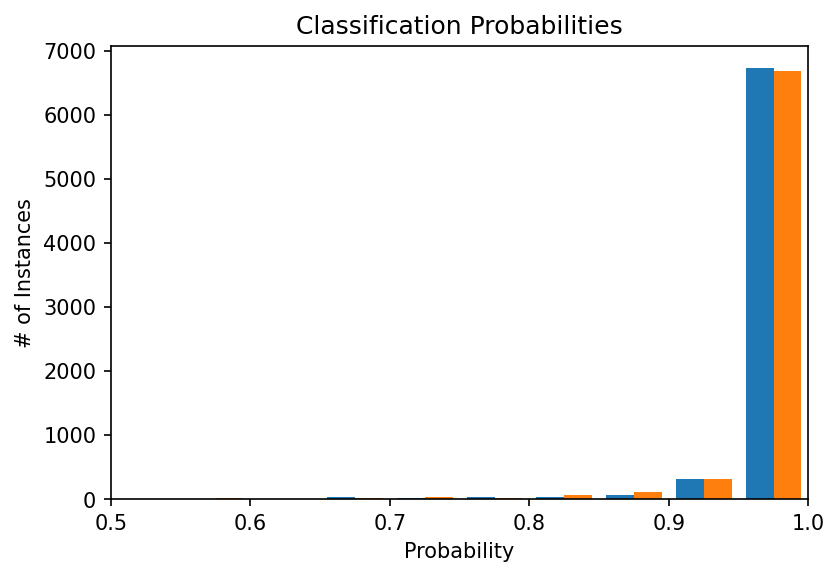

In [72]:
probas = model[4].predict_proba(x_test)
# plot
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.show()